# My Baby's Development

## Setup

##### Import Data & modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import datetime
from matplotlib.dates import DateFormatter

df = pd.read_csv('./HatchBaby_updated')
df.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Unnamed: 9
0,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Weight,8.18,0.8411,NaN,NaN,Measured by Nurse,NaN
1,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Length,21.5,0.9983,NaN,NaN,Measured by Nurse,NaN
2,Hidden Name,03/06/2022 0:00 AM,03/06/2022 0:00 AM,Weight,7.875,NaN,NaN,NaN,Measured by Nurse,NaN


##### Number of Rows

In [2]:
len(df)

1894

##### Data Types

In [3]:
df.dtypes

Baby Name      object
Start Time     object
End Time       object
Activity       object
Amount         object
Percentile    float64
Duration      float64
Info           object
Notes          object
Unnamed: 9    float64
dtype: object

##### Check For Nulls

In [4]:
df.isnull().sum()

Baby Name        1
Start Time       0
End Time         0
Activity         0
Amount           8
Percentile    1864
Duration       712
Info           721
Notes         1796
Unnamed: 9    1894
dtype: int64

##### Drop Unused Column

In [5]:
df2 = df.drop(columns = 'Unnamed: 9')
df2.head(1)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes
0,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Weight,8.18,0.8411,NaN,NaN,Measured by Nurse


##### 'Activity' types

In [6]:
print(df2['Activity'].unique())

['Weight' 'Length' 'Feeding' 'Diaper' 'Sleep' 'Pump']


##### 'Amount' has non-numeric values; find these values

In [7]:
df2[df2['Amount'].isnull()]

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes
504,Hidden Name,04/12/2022 17:05 PM,04/12/2022 18:00 PM,Sleep,NaN,NaN,0.916667,NaN,NaN
508,Hidden Name,04/12/2022 19:05 PM,04/12/2022 20:18 PM,Sleep,NaN,NaN,1.216667,NaN,NaN
863,Hidden Name,05/08/2022 15:25 PM,05/08/2022 16:10 PM,Sleep,NaN,NaN,0.750000,NaN,NaN
891,Hidden Name,05/10/2022 10:51 AM,05/10/2022 12:21 PM,Sleep,NaN,NaN,1.500000,NaN,NaN
906,Hidden Name,05/10/2022 23:55 PM,05/11/2022 1:40 AM,Sleep,NaN,NaN,1.750000,NaN,NaN
907,Hidden Name,05/11/2022 2:15 AM,05/11/2022 2:56 AM,Sleep,NaN,NaN,0.683333,NaN,NaN
923,Hidden Name,05/12/2022 3:50 AM,05/12/2022 5:25 AM,Sleep,NaN,NaN,1.583333,NaN,NaN
924,Hidden Name,05/12/2022 6:10 AM,05/12/2022 8:40 AM,Sleep,NaN,NaN,2.500000,NaN,NaN


In [8]:
#print(df2[df2['Amount'].str.match('\d+') == False]['Amount'].unique())

df_amount_nn = df2[df2['Amount'].str.match('\d+') == False]
print(df_amount_nn['Amount'].unique())

['Wet + Dirty' 'Wet' 'Dirty']


##### Convert Non-numeric 'Amount' to Float

In [9]:
#df_amount_nn['Amount'] = df_amount_nn['Amount'].astype(float)

##### Add 'Date' Column

In [10]:
df2['Date'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.floor('d')
#df2['Date'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.date

##### Add 'Month' Column

In [11]:
df2['Month'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.month

##### Add 'DOW' Column

In [12]:
df2['DOW #'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.dayofweek
df2['DOW'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.day_name()

##### Add 'Time' Column

In [13]:
df2['Time'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.time

##### Add 'Hour' Column

In [14]:
df2['Hour(int)'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.hour

#df2['Hour(dt)'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.floor('H').dt.time
df2['Hour(dt)'] = pd.to_datetime('2022-01-01') + pd.to_timedelta(df2['Hour(int)'], unit='H')
df2['Hour(dt)'] = pd.to_datetime(df2['Hour(dt)'])

##### Sort

In [15]:
df2 = df2.sort_values('Start Time', ascending=True)

df2.tail(5)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
1890,Hidden Name,08/06/2022 15:30 PM,08/06/2022 15:30 PM,Feeding,5,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,15:30:00,15,2022-01-01 15:00:00
1892,Hidden Name,08/06/2022 18:44 PM,08/06/2022 18:44 PM,Feeding,6,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,18:44:00,18,2022-01-01 18:00:00
1888,Hidden Name,08/06/2022 5:55 AM,08/06/2022 5:55 AM,Feeding,4,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,05:55:00,5,2022-01-01 05:00:00
1887,Hidden Name,08/06/2022 6:44 AM,08/06/2022 6:44 AM,Feeding,2,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,06:44:00,6,2022-01-01 06:00:00
1889,Hidden Name,08/06/2022 9:28 AM,08/06/2022 9:28 AM,Feeding,5.8,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,09:28:00,9,2022-01-01 09:00:00


##### Set Style

In [16]:
plt.style.use('Solarize_Light2')
#print(style.available)

## Weight

##### Filter Weight; Drop Null Values from 'Amount'

In [17]:
df_weight = df2[df2['Activity'] == 'Weight']
df_weight = df_weight[df_weight['Amount'].notna()]
df_weight.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
0,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Weight,8.18,0.8411,NaN,NaN,Measured by Nurse,2022-03-05,3,5,Saturday,00:00:00,0,2022-01-01
2,Hidden Name,03/06/2022 0:00 AM,03/06/2022 0:00 AM,Weight,7.875,NaN,NaN,NaN,Measured by Nurse,2022-03-06,3,6,Sunday,00:00:00,0,2022-01-01
4,Hidden Name,03/09/2022 0:00 AM,03/09/2022 0:00 AM,Weight,7.53,0.5487,NaN,NaN,Measured by Nurse,2022-03-09,3,2,Wednesday,00:00:00,0,2022-01-01


##### Convert 'Amount' to Float

In [18]:
df_weight['Amount'] = df_weight['Amount'].astype(float)

##### Plot Weight

Text(0, 0.5, 'Pounds')

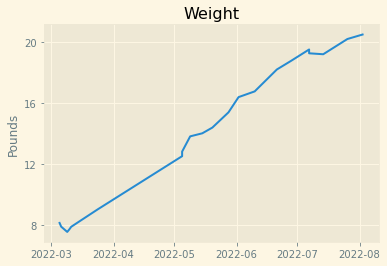

In [19]:
plt.yticks(np.arange(0, (max(df_weight['Amount'])+1), 4))
plt.plot(df_weight['Date'], df_weight['Amount'])
plt.title('Weight')
plt.ylabel('Pounds')

##### Plot Weight Percentile

Text(0.5, 1.0, 'Weight Percentile')

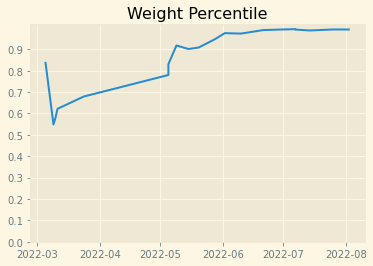

In [20]:
df_weight_p = df_weight[df_weight['Percentile'].notna()]
plt.plot(df_weight_p['Date'], df_weight_p['Percentile'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.yticks(np.arange(0, 1, .1))
plt.title('Weight Percentile')

## Length

##### Filter Length; Drop Null Values from 'Amount'

In [21]:
df_len = df2[df2['Activity'] == 'Length']
df_len = df_len[df_len['Amount'].notna()]
df_len.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
1,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Length,21.5,0.9983,NaN,NaN,Measured by Nurse,2022-03-05,3,5,Saturday,00:00:00,0,2022-01-01
3,Hidden Name,03/09/2022 0:00 AM,03/09/2022 0:00 AM,Length,21.3,0.9884,NaN,NaN,Measured by Nurse,2022-03-09,3,2,Wednesday,00:00:00,0,2022-01-01
7,Hidden Name,03/24/2022 0:00 AM,03/24/2022 0:00 AM,Length,22.2,0.9884,NaN,NaN,Measured by Nurse,2022-03-24,3,3,Thursday,00:00:00,0,2022-01-01


##### Convert 'Amount' to Float

In [22]:
df_len['Amount'] = df_len['Amount'].astype(float)

##### Plot-Length

Text(0, 0.5, 'Inches')

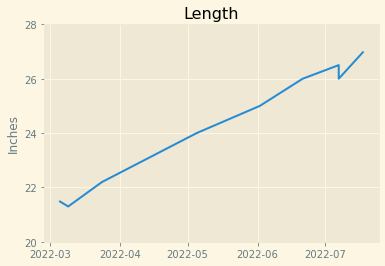

In [23]:
plt.plot(df_len['Date'], df_len['Amount'])
plt.yticks(np.arange(20, (max(df_len['Amount'])+1), 2))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Length')
plt.ylabel('Inches')

##### Plot-Length Percentile

Text(0.5, 1.0, 'Length Percentile')

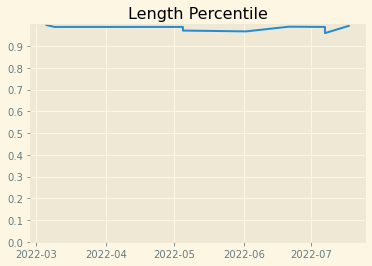

In [24]:
df_len_p = df_len[df_len['Percentile'].notna()]
plt.plot(df_len_p['Date'], df_len_p['Percentile'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.yticks(np.arange(0, 1, .1))
plt.title('Length Percentile')

## Feeding

##### Filter Feeding; Drop Null Values

In [25]:
df_feed = df2[df2['Activity'] == 'Feeding']
df_feed = df_feed[df_feed['Amount'].notna()]
df_feed.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
18,Hidden Name,03/13/2022 0:56 AM,03/13/2022 0:56 AM,Feeding,2,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,00:56:00,0,2022-01-01 00:00:00
13,Hidden Name,03/13/2022 11:45 AM,03/13/2022 11:45 AM,Feeding,2.5,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,11:45:00,11,2022-01-01 11:00:00
24,Hidden Name,03/13/2022 14:45 PM,03/13/2022 14:45 PM,Feeding,2.5,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,14:45:00,14,2022-01-01 14:00:00


##### Convert 'Amount' to Float

In [26]:
df_feed['Amount'] = df_feed['Amount'].astype(float)

##### Group & Sum by Day

In [27]:
df_feed_sum_day = df_feed['Amount'].groupby(df_feed['Date']).sum().reset_index(name ='Day Feed Amount')
#(df_feed.groupby(['Date']))['Amount'].sum()

##### Plot-Feeding Amount By Day

Text(0, 0.5, 'Ounces')

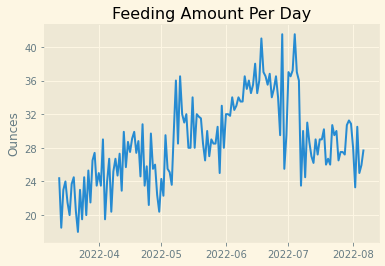

In [28]:
plt.yticks(np.arange(0, (max(df_feed_sum_day['Day Feed Amount'])+1), 4))
plt.plot(df_feed_sum_day['Date'], df_feed_sum_day['Day Feed Amount'])
plt.title('Feeding Amount Per Day')
plt.ylabel('Ounces')

##### Group & Sum by Hour-Bar

In [29]:
df_feed_sum_hr_bar = df_feed.groupby(['Hour(dt)']).agg({'Amount': ['sum']}).reset_index()
df_feed_sum_hr_bar.head(3)

,Hour(dt),Amount
,,sum
0,2022-01-01 00:00:00,83.3
1,2022-01-01 01:00:00,71.6
2,2022-01-01 02:00:00,73.7


##### Bar-Feeding Amount By Time

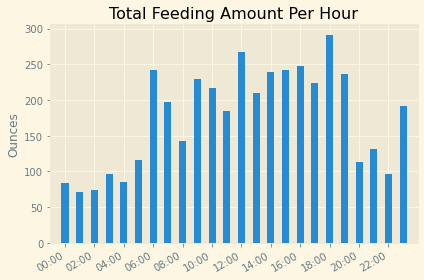

In [30]:
fig, ax_fs_h = plt.subplots()

x_fs_h = df_feed_sum_hr_bar['Hour(dt)']
y_fs_h = df_feed_sum_hr_bar['Amount']['sum']
ax_fs_h.bar(x_fs_h, y_fs_h, width=0.02)

hours = mdates.HourLocator(interval = 2)
hh_mm = mdates.DateFormatter('%H:%M')
ax_fs_h.xaxis.set_major_locator(hours)
ax_fs_h.xaxis.set_major_formatter(hh_mm)

ax_fs_h.set_title('Total Feeding Amount Per Hour')
ax_fs_h.set_ylabel('Ounces')

ax_fs_h.set_xlim(datetime.datetime(2021, 12, 31, 23, 0), datetime.datetime(2022, 1, 1, 23, 59))
#plt.setp(ax_fs_h.get_xticklabels()[-1], visible=False)

fig.autofmt_xdate()
fig.tight_layout()

##### Group & Sum by Hour-Plot

In [31]:
df_feed_sum_hr_plot = df_feed['Amount'].groupby(df_feed['Hour(int)']).sum().reset_index(name ='Hour Feed Amount')
df_feed_sum_hr_plot.head()

,Hour(int),Hour Feed Amount
0,0,83.3
1,1,71.6
2,2,73.7
3,3,96.9
4,4,85.5


##### Plot-Feeding Amount by Time

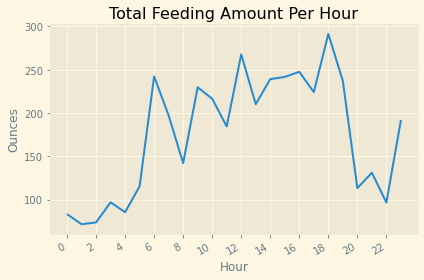

In [32]:
plt.yticks(np.arange(0, (max(df_feed_sum_hr_plot['Hour Feed Amount'])+20), 50))
plt.xticks(np.arange(0, 23, 2))
plt.plot(df_feed_sum_hr_plot['Hour(int)'], df_feed_sum_hr_plot['Hour Feed Amount'])
plt.title('Total Feeding Amount Per Hour')
plt.ylabel('Ounces')
plt.xlabel('Hour')
plt.gcf().autofmt_xdate()
plt.gcf().tight_layout()

##### Group & Avg by Hour

In [33]:
df_feed_avg_hr = df_feed['Amount'].groupby(df_feed['Hour(int)']).mean().reset_index(name ='Hour Feed Avg')

df_feed_avg_hr.head(3)

,Hour(int),Hour Feed Avg
0,0,2.776667
1,1,3.113043
2,2,2.834615


Text(0.5, 0, 'Hour')

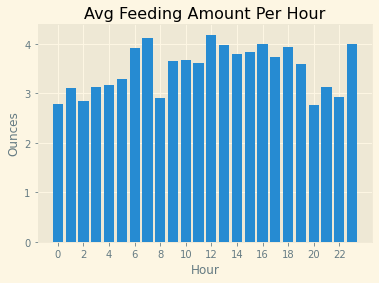

In [34]:
plt.yticks(np.arange(0, (max(df_feed_avg_hr['Hour Feed Avg'])+1), 1))
plt.xticks(np.arange(0, 23, 2))
plt.bar(df_feed_avg_hr['Hour(int)'], df_feed_avg_hr['Hour Feed Avg'])
plt.title('Avg Feeding Amount Per Hour')
plt.ylabel('Ounces')
plt.xlabel('Hour')

##### Group & Avg by Month, Hour

In [35]:
df_feed_sum_mth_hr = df_feed.groupby(['Month', 'Hour(int)', 'Hour(dt)']).agg({'Amount': ['sum']})
#df_feed_avg_mth_hr.rename(index={2: 'Month-Hour Avg Amount'})
df_feed_sum_mth_hr = df_feed_sum_mth_hr.reset_index()

df_feed_sum_mth_hr.head(3)

,Month,Hour(int),Hour(dt),Amount
,,,,sum
0,3,0,2022-01-01 00:00:00,24.5
1,3,1,2022-01-01 01:00:00,9.0
2,3,2,2022-01-01 02:00:00,14.7


##### Bar-Total Feeding Amount by Hour/Month

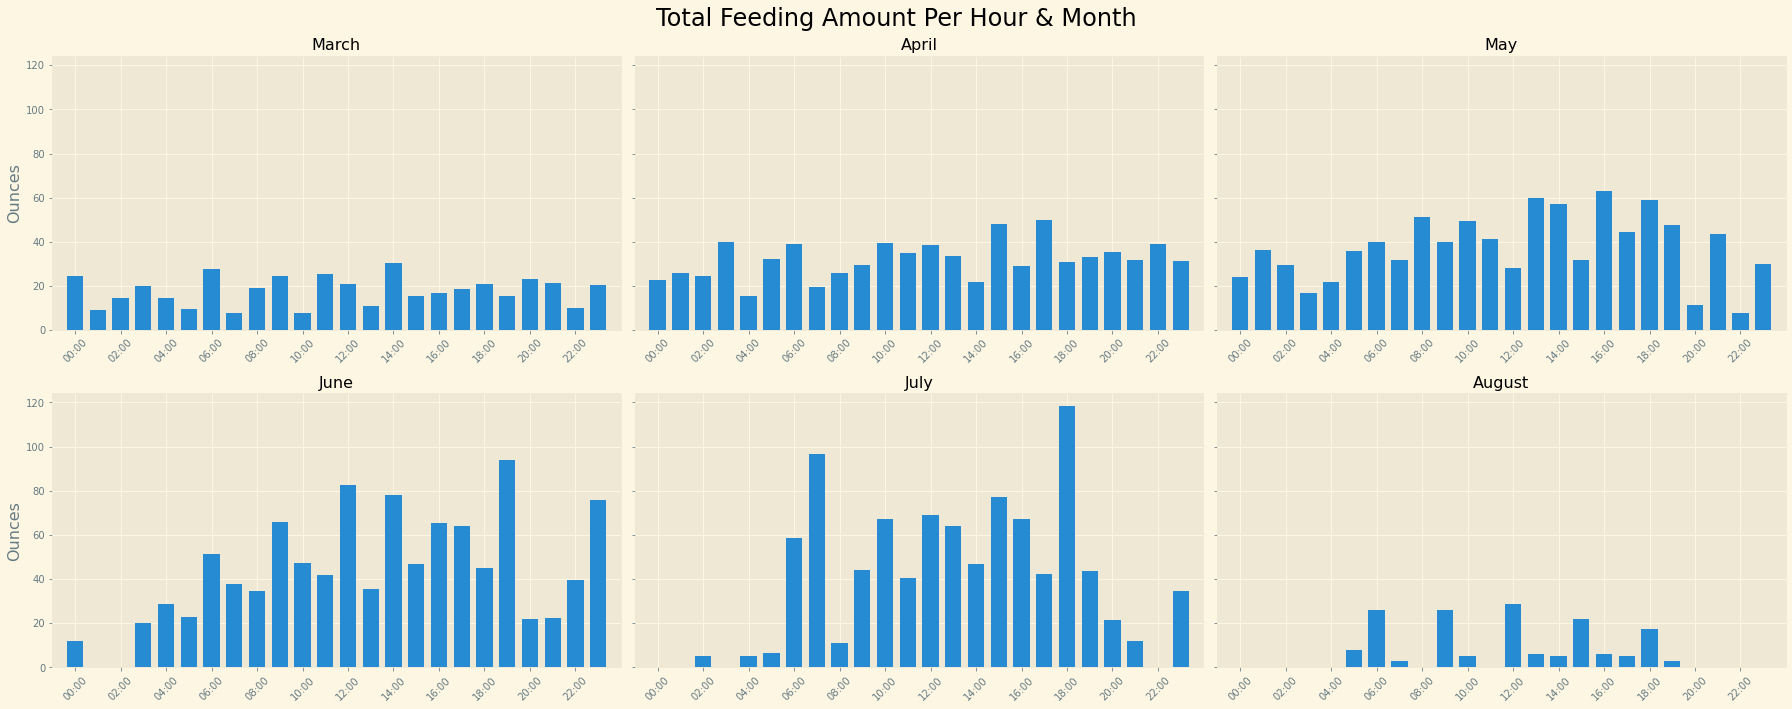

In [36]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(25,10), sharey=True)

list_of_axes = [ax1, ax2, ax3, ax4, ax5, ax6]
n = 3
month_name = ['March', 'April', 'May', 'June', 'July', 'August']
i = 0

for ax in list_of_axes:
    df_feed_sum_mth_hr_m = df_feed_sum_mth_hr[df_feed_sum_mth_hr['Month'] == n]
    x = df_feed_sum_mth_hr_m['Hour(dt)']
    y = df_feed_sum_mth_hr_m['Amount']['sum']
    ax.bar(x, y, width=0.03, align='center')
    ax.title.set_text(month_name[i])
    n = n+1
    i = i+1

for ax in list_of_axes:
    hours = mdates.HourLocator(interval=2)
    hh_mm = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hh_mm)
    ax.set_xlim([datetime.datetime(2021,12,31,23,0), datetime.datetime(2022,1,1,23,59)])
    plt.setp(ax.get_xticklabels(), rotation=45)  

ax1.set_ylabel('Ounces', fontsize=16)
ax4.set_ylabel('Ounces', fontsize=16)
fig.suptitle('Total Feeding Amount Per Hour & Month', fontsize=24)

#fig.autofmt_xdate()
fig.tight_layout()

##### Group & Avg by Month, Hour

In [37]:
df_feed_avg_mth_hr = df_feed.groupby(['Month', 'Hour(int)', 'Hour(dt)']).agg({'Amount': ['mean']})
#df_feed_avg_mth_hr_m.rename(index={2: 'Month-Hour Avg Amount'})
df_feed_avg_mth_hr = df_feed_avg_mth_hr.reset_index()

df_feed_avg_mth_hr.head(3)

,Month,Hour(int),Hour(dt),Amount
,,,,mean
0,3,0,2022-01-01 00:00:00,2.227273
1,3,1,2022-01-01 01:00:00,2.250000
2,3,2,2022-01-01 02:00:00,2.100000


##### Bar-Avg Feeding Amount by Hour/Month

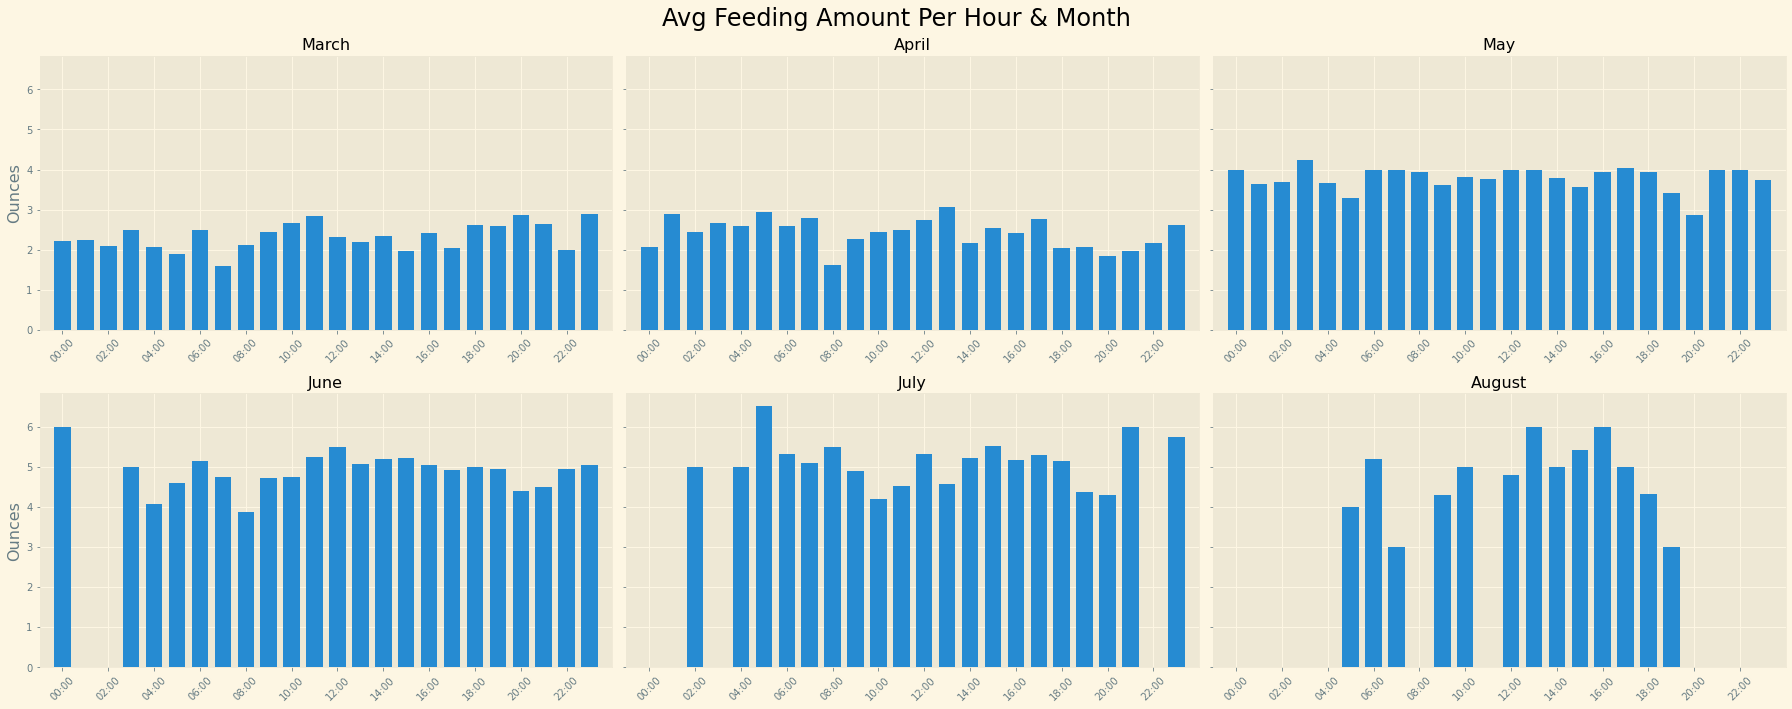

In [38]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(25,10), sharey=True)

list_of_axes = [ax1, ax2, ax3, ax4, ax5, ax6]
n = 3
month_name = ['March', 'April', 'May', 'June', 'July', 'August']
i = 0

for ax in list_of_axes:
    df_feed_avg_mth_hr_m = df_feed_avg_mth_hr[df_feed_avg_mth_hr['Month'] == n]
    x = df_feed_avg_mth_hr_m['Hour(dt)']
    y = df_feed_avg_mth_hr_m['Amount']['mean']
    ax.bar(x, y, width=0.03)
    ax.title.set_text(month_name[i])
    n = n+1
    i = i+1

for ax in list_of_axes:
    hours = mdates.HourLocator(interval=2)
    hh_mm = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hh_mm)
    ax.set_xlim([datetime.datetime(2021,12,31,23,0), datetime.datetime(2022,1,1,23,59)])
    plt.setp(ax.get_xticklabels(), rotation=45)
    
ax1.set_ylabel('Ounces', fontsize=16)
ax4.set_ylabel('Ounces', fontsize=16)
fig.suptitle('Avg Feeding Amount Per Hour & Month', fontsize=24)

#fig.autofmt_xdate()
fig.tight_layout()

## Dirty Diapers

##### Filter Diapers, Dirty

In [39]:
df_diapers = df2[df2['Activity']=='Diaper']
df_drty_diapers = df_diapers[df_diapers['Amount'].str.contains('Dirty')]
df_drty_diapers.tail(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
1852,Hidden Name,07/31/2022 14:23 PM,07/31/2022 14:23 PM,Diaper,Dirty,NaN,NaN,NaN,NaN,2022-07-31,7,6,Sunday,14:23:00,14,2022-01-01 14:00:00
1868,Hidden Name,08/03/2022 8:44 AM,08/03/2022 8:44 AM,Diaper,Dirty,NaN,NaN,NaN,NaN,2022-08-03,8,2,Wednesday,08:44:00,8,2022-01-01 08:00:00
1886,Hidden Name,08/05/2022 17:20 PM,08/05/2022 17:20 PM,Diaper,Dirty,NaN,NaN,NaN,NaN,2022-08-05,8,4,Friday,17:20:00,17,2022-01-01 17:00:00


##### Bar-Total Dirty Diapers by DOW

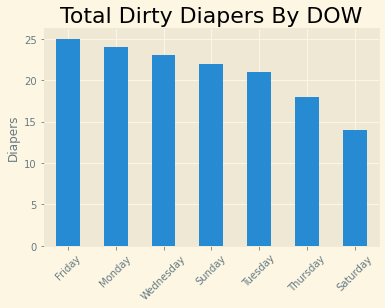

In [40]:
ax = pd.value_counts(df_drty_diapers['DOW']).plot.bar()
ax.set_title('Total Dirty Diapers By DOW', fontsize=22)
ax.set_ylabel('Diapers')
ax.tick_params(axis='x', rotation=45)

##### Plot-Dirty Diaper Frequency

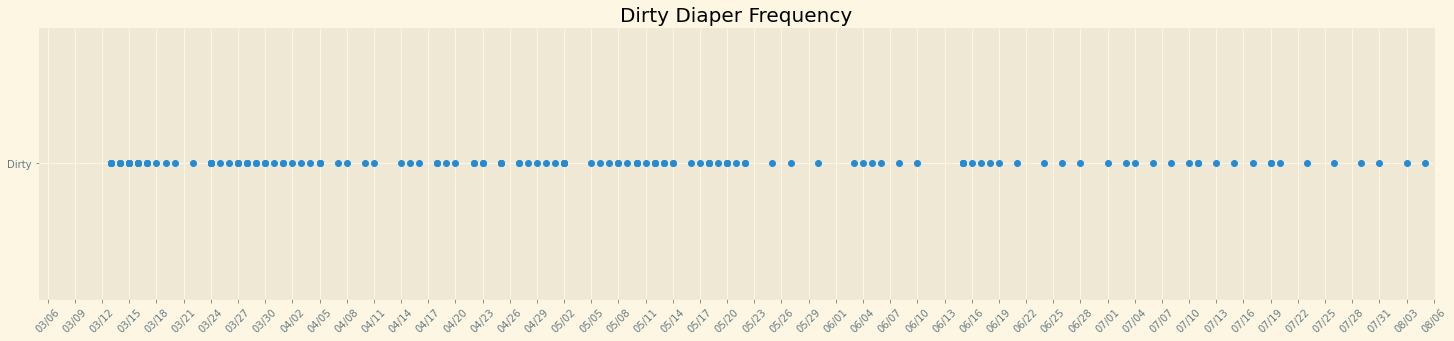

In [41]:
df_drty_diapers_plot = df_drty_diapers.copy()
df_drty_diapers_plot['Amount'] = df_drty_diapers['Amount'].replace('Wet + Dirty', 'Dirty')

x = df_drty_diapers_plot['Date']
y = df_drty_diapers_plot['Amount']

fig, ax_dd = plt.subplots(1,1, figsize=(25,5))

plt.xlim([datetime.date(2022, 3, 5), datetime.date(2022, 8, 6)])
plt.tick_params(axis='x', rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax_dd.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax_dd.set_title('Dirty Diaper Frequency', fontsize=20)
ax_dd = plt.scatter(x,y)

##### Plot-Dirty Diaper Total by Month

In [42]:
df_drty_diapers_mth = df_drty_diapers_plot.groupby('Month')
df_drty_diapers_mth['Amount'].count()

Month
3    41
4    31
5    37
6    18
7    18
8     2
Name: Amount, dtype: int64

##### Plot-Dirty Diaper Frequency by Month

In [43]:
df_drty_diapers_mth['Amount'].count().div(31)

Month
3    1.322581
4    1.000000
5    1.193548
6    0.580645
7    0.580645
8    0.064516
Name: Amount, dtype: float64